これまで訓練データを用いて予測モデルを作成し，テストデータや予測用データに予測モデルを適応させる「教師あり学習」について学習してきた。

この章では，予測ではなく解析のための「教師なし学習」について学習していく。

## 1. The Challenge of Unsupervised Learning

教師なし学習はよく「探索的データ分析」としてふるまう。

## 2. Principal Components Analysis（主成分分析）

主成分回帰は6.3.1章で紹介している。主成分回帰では予測子として主成分を使って回帰モデルに適応させる。

主成分分析では主成分を求める過程を言及する。

### 1. What Are Principal Components?

第一主成分を標準化された線形結合で示すと，次のようになる。
$$
Z_1 = \phi_{11}X_1 + \phi_{21}X_2 + \dots + \phi_{p1}X_p \tag{10.1}
$$
第一主成分は最も分散が大きいものである。標準化することによって，$\sum_{j=1}^p\phi_{j1}^2=1$となる。この$\phi_1 = (\phi_{11}\ \phi_{21}\ \dots\ \phi_{p1})^T$は主成分固有ベクトルとなる。

第二主成分は第一主成分と無相関な成分であり，第二主成分の固有ベクトルは第一主成分の固有ベクトルに直交するようになる。変数が2つの場合は，第二主成分は第一主成分が決定すると同時に一意に決まる。

変数が2より多い場合，第二主成分は第一主成分の固有ベクトルに対して直交なベクトルを持つ，第一主成分以外で最も分散が大きい成分となる。

さらに，第三主成分は，第一・第二主成分のベクトルの双方と直交した固有ベクトルを持ち，第一・第二主成分以外で最も分散が大きい成分となる。

これをひたすら続けていき，変数の数の分だけ主成分と固有ベクトルを生成することができる。

### 2. Another Interpretation of Principal Components

主成分分析によって求める主成分得点，固有ベクトルから逆に元の値や近似値を求めることができる。
$$
x_{ij} = \sum_{m=1}^M z_{im}\phi_{jm} \tag{10.5}
$$

### 3. More on PCA

- 変数の標準化  
変数毎に単位が異なる場合がある。単位による影響を無くすために，主成分分析を行う前に標準化すると良い。

- 主成分の一意性  
固有ベクトルは符号を除いて一意に決まる。固有ベクトルと主成分得点から元の値を求めるとき，両方とも符号が反転していれば，最終的には符号が変化していても積は同じ符号になるので，符号の変化に注意が必要である。

- 分散の割合  
主成分分析における成分毎の寄与率は式（10.6）～（10.8）の手順を通して，（第m主成分の分散）/（全ての主成分の分散）によって決まる。
$$
\sum_{j=1}^pVar(X_j)=\sum_{j=1}^p \frac{1}{n}\sum_{i=1}^{n}x_{ij}^2 \tag{10.6}
$$
$$
\frac{1}{n}\sum_{i=1}^{n}z_{ij}^2 = \frac{1}{n}\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2 \tag{10.7} 
$$
$$
\frac{\sum_{i=1}^{n}(\sum_{j=1}^{p}\phi_{jm}x_{ij})^2}{\sum_{j=1}^p \sum_{i=1}^n x_{ij}^2} \tag{10.8}
$$

- どれだけの主成分を使用するか  
図10.4のスクリープロットがよく判断基準に使用される。例えば，寄与率が5%以上の主成分だけを用いる手段や，第一主成分から累積で90%までの主成分を用いる手段などがある。

### 4. Other Uses for Principal Components

主な傾向は寄与率が大きい数個の主成分で決まり，ノイズが小さくなることが多い。そのため，主成分分析は回帰，分類などの手法において主要成分だけを使用するための手段となる。


In [1]:
# Data
states = row.names(USArrests)
print(states)
print(names(USArrests))
print("mean")
print(apply(USArrests, 2, mean)) # 2はcolumn軸
print("var")
print(apply(USArrests, 2, var))

 [1] "Alabama"        "Alaska"         "Arizona"        "Arkansas"      
 [5] "California"     "Colorado"       "Connecticut"    "Delaware"      
 [9] "Florida"        "Georgia"        "Hawaii"         "Idaho"         
[13] "Illinois"       "Indiana"        "Iowa"           "Kansas"        
[17] "Kentucky"       "Louisiana"      "Maine"          "Maryland"      
[21] "Massachusetts"  "Michigan"       "Minnesota"      "Mississippi"   
[25] "Missouri"       "Montana"        "Nebraska"       "Nevada"        
[29] "New Hampshire"  "New Jersey"     "New Mexico"     "New York"      
[33] "North Carolina" "North Dakota"   "Ohio"           "Oklahoma"      
[37] "Oregon"         "Pennsylvania"   "Rhode Island"   "South Carolina"
[41] "South Dakota"   "Tennessee"      "Texas"          "Utah"          
[45] "Vermont"        "Virginia"       "Washington"     "West Virginia" 
[49] "Wisconsin"      "Wyoming"       
[1] "Murder"   "Assault"  "UrbanPop" "Rape"    
[1] "mean"
  Murder  Assault UrbanPop

  Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232 
   Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385 
                PC1        PC2        PC3         PC4
Murder   -0.5358995  0.4181809 -0.3412327  0.64922780
Assault  -0.5831836  0.1879856 -0.2681484 -0.74340748
UrbanPop -0.2781909 -0.8728062 -0.3780158  0.13387773
Rape     -0.5434321 -0.1673186  0.8177779  0.08902432


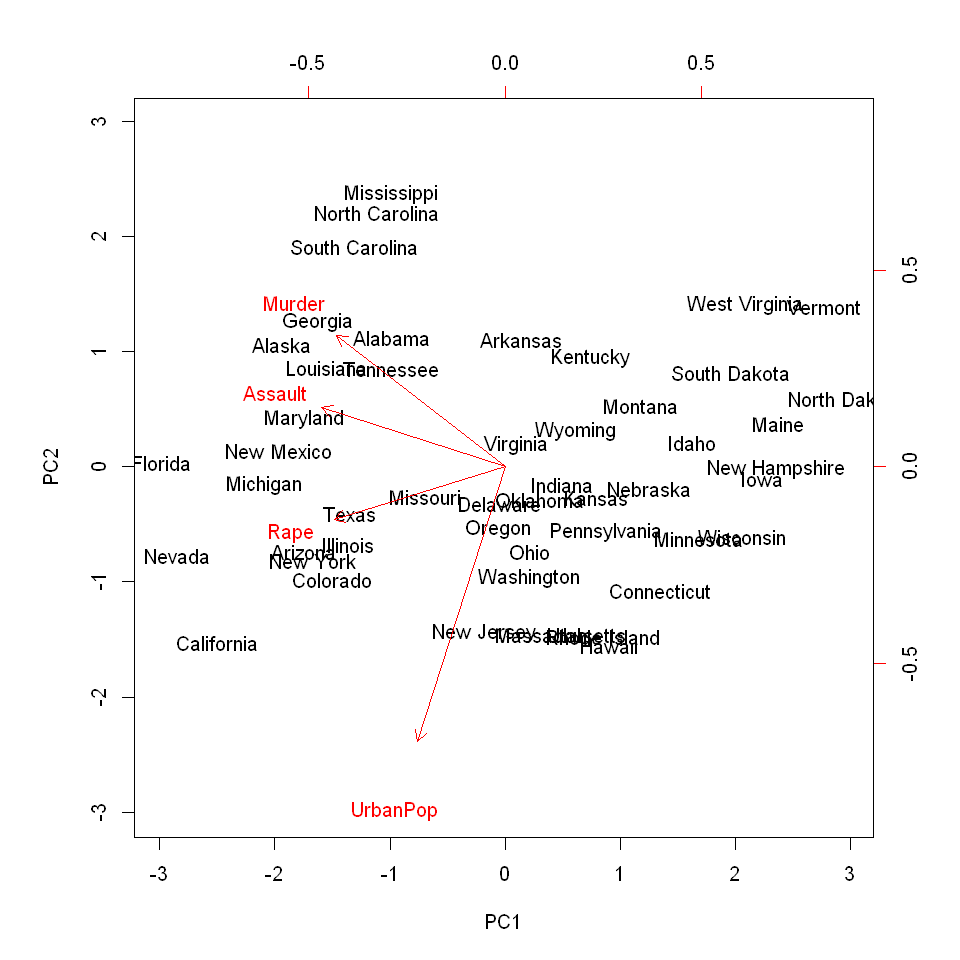

In [2]:
# PCA
pr_out = prcomp(USArrests, scale=TRUE)
print(pr_out$center)
print(pr_out$scale)
print(pr_out$rotation)
options(repr.plot.width=8, repr.plot.height=8) # jupyter用
biplot(pr_out, scale=0) # 図10.1と原点対象の図ができる

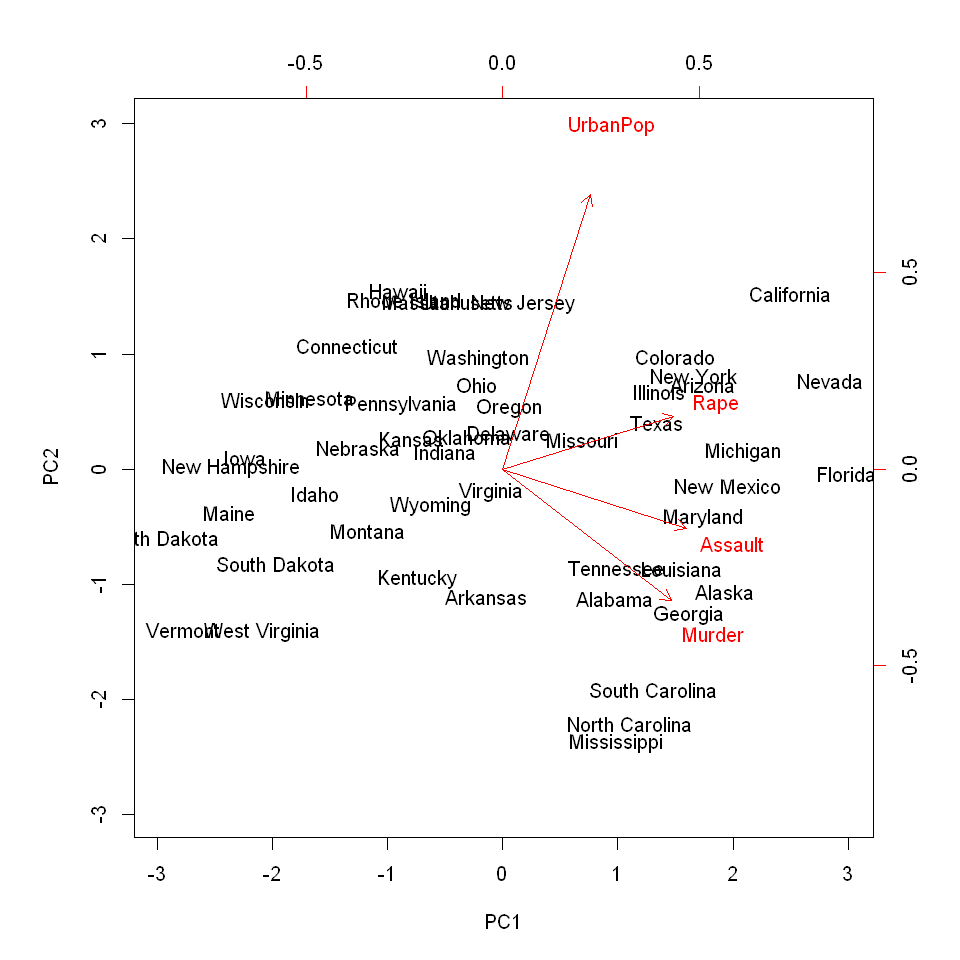

In [3]:
# Fig. 10.1
pr_out$rotation = -pr_out$rotation
pr_out$x = - pr_out$x
biplot(pr_out, scale=0)

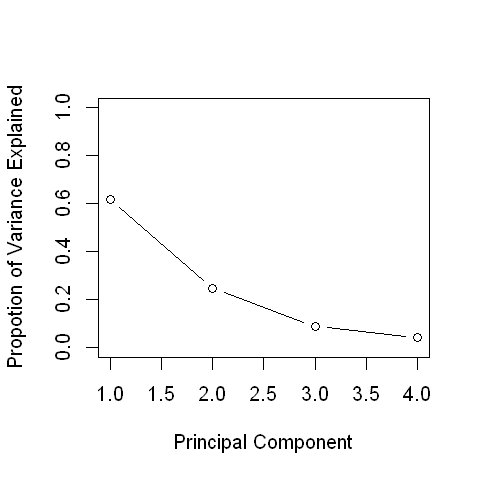

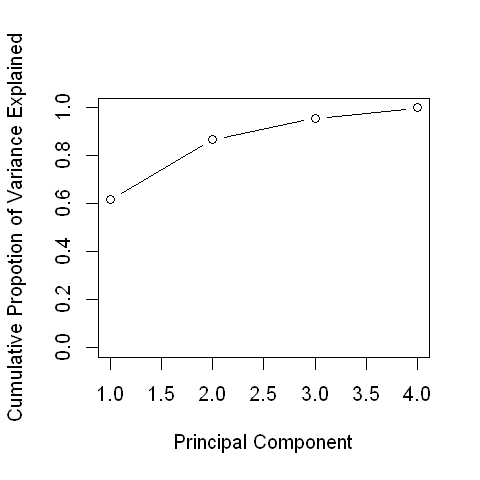

In [4]:
# 寄与率
pr_var = pr_out$sdev ^ 2
pve = pr_var / sum(pr_var)
options(repr.plot.width=4, repr.plot.height=4) # jupyter用
plot(pve, xlab="Principal Component", ylab="Propotion of Variance Explained", ylim=c(0, 1), type='b')
plot(cumsum(pve), xlab="Principal Component", ylab="Cumulative Propotion of Variance Explained", ylim=c(0, 1), type='b') # 累積

## 3. Clusters Methods

主成分分析は，分散の大部分を説明する観測の低次元表現を見つける手法である。一方，クラスタリングは観測の中で同質のグループを見つける手法である。

### 1. K-Means Clustering

K-Meansは2つの性質を満たす。

1. それぞれの観測値がKのうち少なくとも1つのクラスターに属する。
2. 観測値は2つ以上のクラスターに属することはない。

K-Meansはクラスター内の分散をなるべく小さくして，良いクラスターを作ろうとする。つまり，クラスター内の散らばり具合を示す関数をWとして，式（10.9）を解くことになる。
$$
\underset{minimize}{C_1, \dots, C_K}{\sum_{k=1}^K W(C_k)} \tag{10.9}
$$
Wの関数には，ユークリッドの距離の2乗がよく使用されるため，$W(C_k)$は次のようになる。
$$
W(C_k) = \frac{1}{|C_k|}\sum_{i, i' \in C_k}\sum_{j=1}^p (x_{ij} - x{i'j})^2 \tag{10.10}
$$
これらの式を解くために，K-Meansのアルゴリズムは下記のように非常に容易なものとなっている。

1. それぞれの観測点にランダムに1～Kの番号をつける。これが初期値となる。
2. クラスター割り当ての変化がなくなるまで以下を繰り返す。

    (a)K個のクラスターそれぞれの核（重心）を計算する。
    
    (b)各観測点を最も近い核が属するクラスターに割り当てる。（距離の計算にはユークリッド距離を使用する）

K-Meansは初期値の作成の際にランダムであり，結果が初期値に依存してしまう。そのため，式（10.9）を満たすために複数回K-Meansを実行し，各クラスターの分散の合計が最も小さくなる結果を採用する。

また，潜在的な欠点として，事前にクラスター数Kを決定しなければならない。

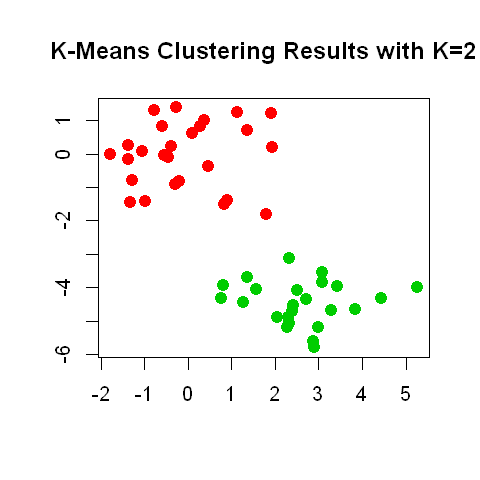

In [5]:
# K-Means
x = matrix(rnorm(50 * 2), ncol=2)
x[1:25, 1] = x[1:25, 1] + 3
x[1:25, 2] = x[1:25, 2] - 4
km_out = kmeans(x, 2, nstart=20)
plot(x, col=(km_out$cluster+1), main="K-Means Clustering Results with K=2", xlab="", ylab="", pch=20, cex=2)

             Length Class  Mode   
cluster      50     -none- numeric
centers       6     -none- numeric
totss         1     -none- numeric
withinss      3     -none- numeric
tot.withinss  1     -none- numeric
betweenss     1     -none- numeric
size          3     -none- numeric
iter          1     -none- numeric
ifault        1     -none- numeric


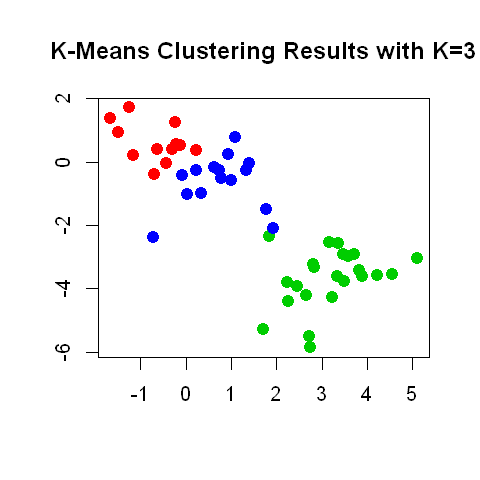

In [6]:
# K = 3
x = matrix(rnorm(50 * 2), ncol=2)
x[1:25, 1] = x[1:25, 1] + 3
x[1:25, 2] = x[1:25, 2] - 4
km_out = kmeans(x, 3, nstart=20)
print(summary(km_out))
plot(x, col=(km_out$cluster+1), main="K-Means Clustering Results with K=3", xlab="", ylab="", pch=20, cex=2)

[1] "Only one times"
[1] 84.5832


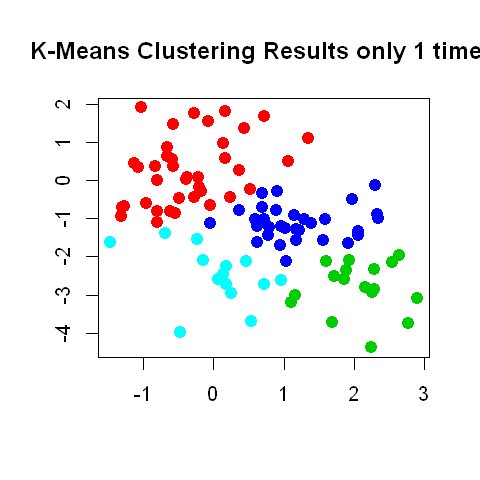

[1] "3 times"
[1] 79.57689


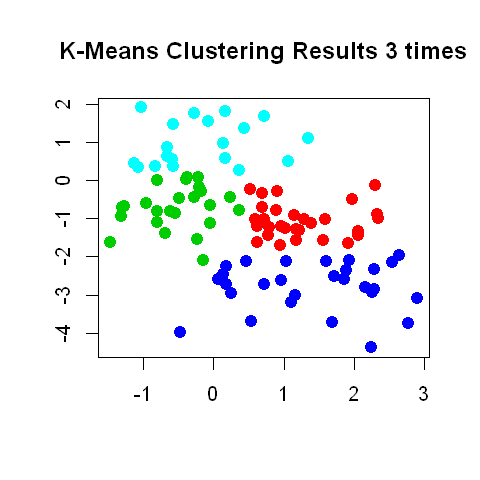

[1] "10 times"
[1] 79.55422


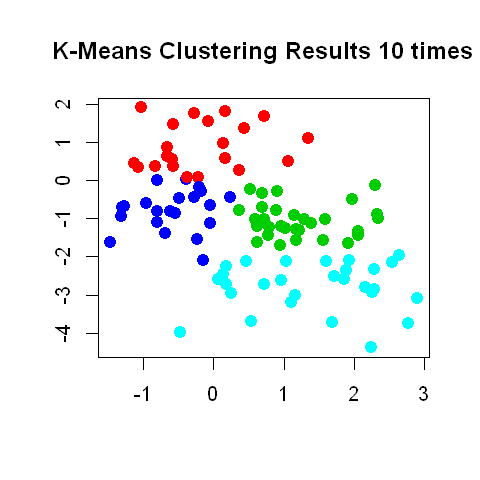

In [7]:
# K=Meansを行う回数を変化させる
set.seed(4)
x = matrix(rnorm(100 * 2), ncol=2)
x[1:50, 1] = x[1:50, 1] + 1
x[1:50, 2] = x[1:50, 2] - 2
km_out = kmeans(x, 4, nstart=1)
plot(x, col=(km_out$cluster+1), main="K-Means Clustering Results only 1 times", xlab="", ylab="", pch=20, cex=2)
print("Only one times")
print(km_out$tot.withinss)

km_out = kmeans(x, 4, nstart=3)
plot(x, col=(km_out$cluster+1), main="K-Means Clustering Results 3 times", xlab="", ylab="", pch=20, cex=2)
print("3 times")
print(km_out$tot.withinss)

km_out = kmeans(x, 4, nstart=10)
plot(x, col=(km_out$cluster+1), main="K-Means Clustering Results 10 times", xlab="", ylab="", pch=20, cex=2)
print("10 times")
print(km_out$tot.withinss)

### 2. Hierarchical Clustering

デンドログラムと呼ばれる樹形図を作成する手法である。

- デンドログラムの解釈

デンドログラムでは，横軸にデータ，縦軸にクラスター間の距離が並ぶ。縦軸のクラスター間の距離で何個のクラスターにするのかを決定することもできる。

- 階層的クラスタリングのアルゴリズム


1. n個の観測点それぞれをクラスタとみなし，$\begin{pmatrix}n\\2\end{pmatrix}$個の非類似度を算出する。
2. $i = n, n-1, \dots, 2$に対して，

    (a)i個のクラスター間の非類似度を算出し，最も非類似度が小さい（最も類似している）クラスター同士を融合する。融合した際の非類似度をデンドログラムの高さとして示す。
    
    (b)残りのi-1個の間の非類似度を計算する。
    
- 非類似度の計算手法の選択

Rで用意されている手法は，次の表の4つと，"ward.D"，"ward.D2"，"mcquitty"，"median"の4つである。

![Table10.2](./table10.2.PNG)

CompleteはクラスタA内の観測点とクラスタB内の観測点の間の距離を算出し，最も距離が離れている点同士の距離を非類似度にする方法である。完全連結法とも呼ばれる。

SingleはCompleteとは違い，最も距離が近い点同士の距離を非類似度にする方法である。単連結法とも呼ばれる。

AverageはクラスタA内の観測点とクラスタB内の観測点の間の距離の平均値を非類似度にする方法である。群平均法とも呼ばれる。

CentroidはクラスタAの重心とクラスタBの重心の間の距離を非類似度にする方法である。重心法とも呼ばれる。

ward.D2は最小分散法であるWard法である。ward.Dはその1乗版で，本来計算すべきである2乗が計算されない。クラスターが結合した際のクラスター内の分散の増分を非類似度にしている。

mcquittyはMcQuitty法である。2つのクラスターを結合した場合に，他のクラスターからの距離の平均をを非類似度にしている。

medianは重心の代わりに中点を使用する方法である。

### 3. Practical Issues in Clustering

- 小さな決断から大きな結果が生まれてしまう

クラスタリングをする際にはいくつかの決定が必要である。  
・標準化  
・距離（ユークリッド距離以外にもマンハッタン距離などがある）  
・結合方法  
・デンドログラムの分ける位置  
・K-MeansのKの数  

- クラスタ分けの検証

クラスタにp値を割り当てる手法が数多く存在するが，最良の方法といえるものはなく，検証するのが難しい。

- その他の考慮事項

K-Meansも階層型クラスタリングも，観測点をクラスタに割り当てる手法である。しかし，これは時によれば不適切な場合もある。既に大きく離れた外れ値があった場合，これらの手法は外れ値も含めてすべての観測値を対象として結果を算出するので，結果のクラスタが大きく歪む可能性がある。外れ値にも対応したソフトバージョンのK-Meansがある。

また，クラスタリング手法は観測点の摂動にたいしてあまり堅牢ではない。

- クラスタリング結果を解釈するために

標準化の方法や結合方法などを変化させて，結果全体を見ることによって，どの解析が適切であるのかを見極めていくことが大切である。

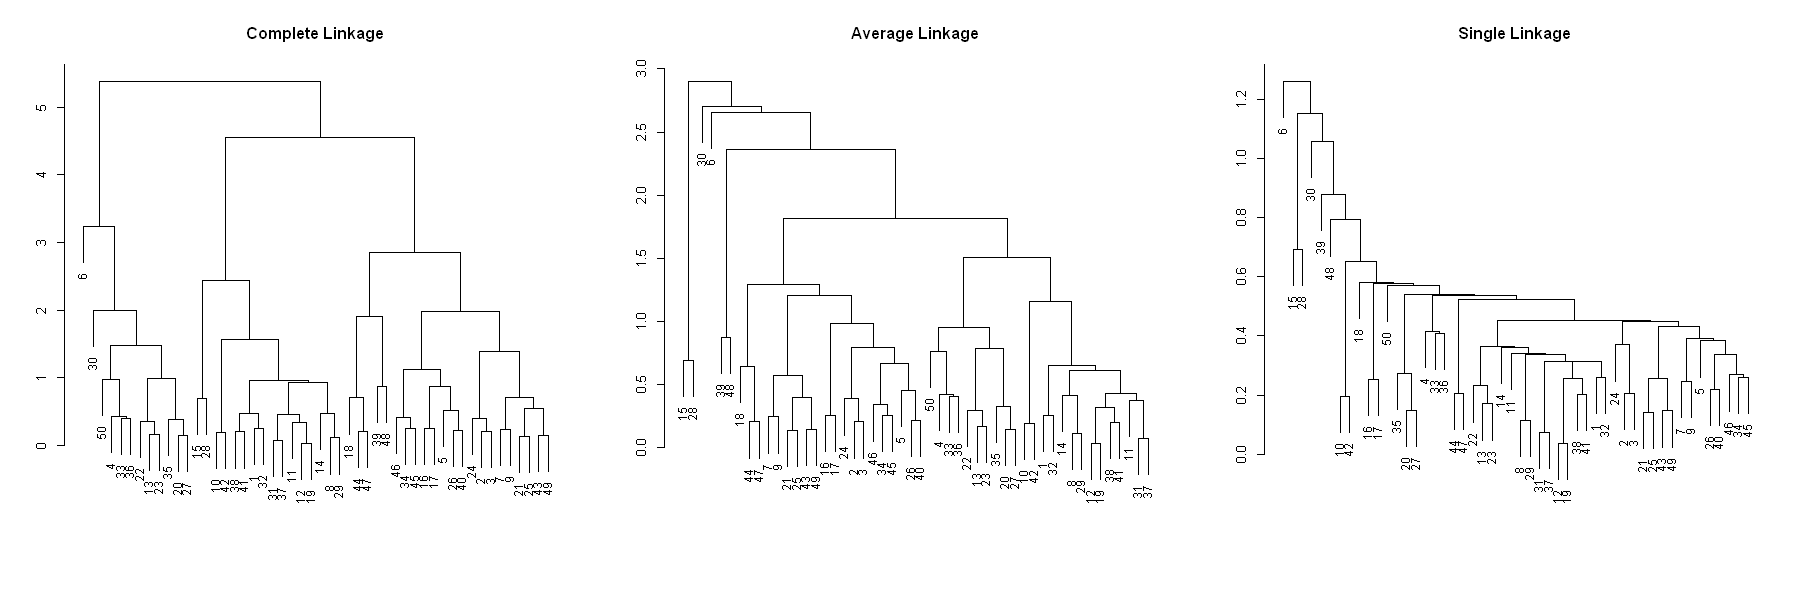

In [8]:
# Hierarchical Clustering
x = matrix(rnorm(50 * 2), ncol=2)
hc_complete = hclust(dist(x), method="complete")
hc_average = hclust(dist(x), method="average")
hc_single = hclust(dist(x), method="single")

options(repr.plot.width=15, repr.plot.height=5) # jupyter用
par(mfrow=c(1, 3))
plot(hc_complete, main="Complete Linkage", xlab="", ylab="", sub="", cex=.9)
plot(hc_average, main="Average Linkage", xlab="", ylab="", sub="", cex=.9)
plot(hc_single, main="Single Linkage", xlab="", ylab="", sub="", cex=.9)

In [9]:
# 2つに分ける
print("Complete Linkage")
print(cutree(hc_complete, 2))
print("Average Linkage")
print(cutree(hc_average, 2))
print("Single Linkage")
print(cutree(hc_single, 2))

[1] "Complete Linkage"
 [1] 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 1 2 1 1 2 1 1 2 1 2 2 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 2
[1] "Average Linkage"
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1
[1] "Single Linkage"
 [1] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1


In [10]:
# 4つにわける
print("Single Linkage")
print(cutree(hc_single, 4))

[1] "Single Linkage"
 [1] 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 3 1 4 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1


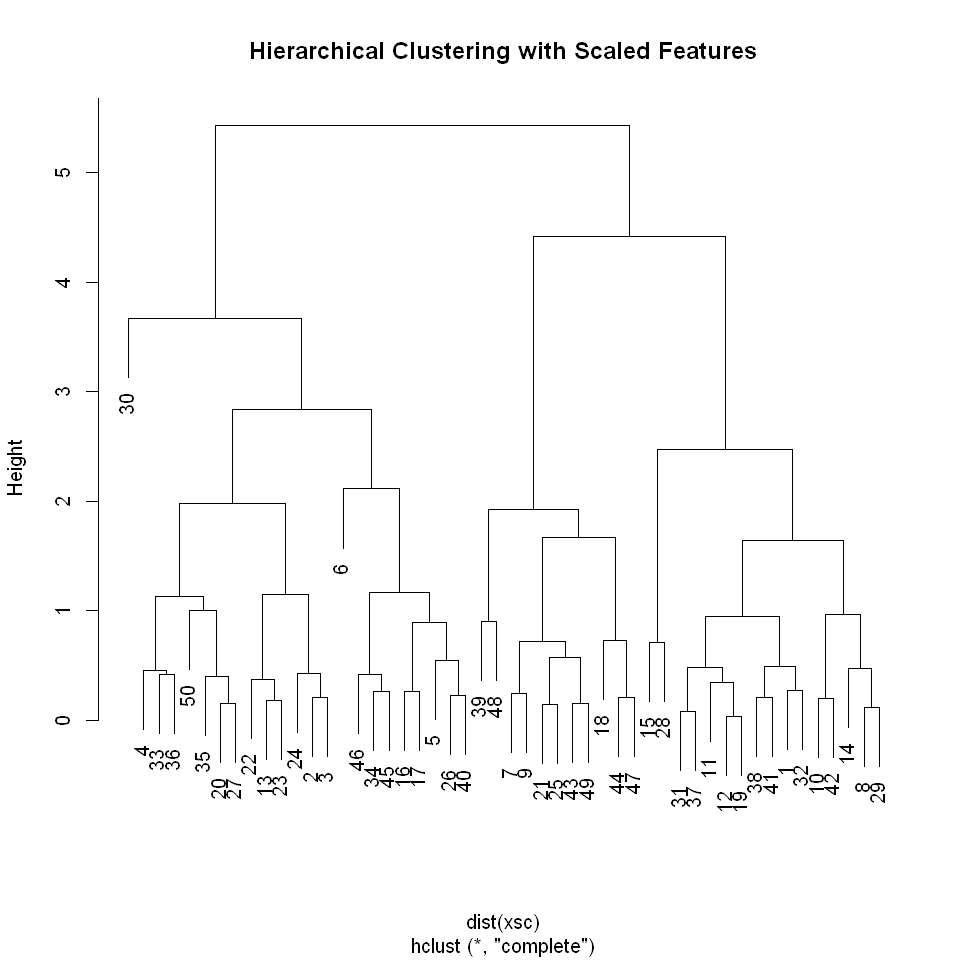

In [11]:
# 標準化する
xsc = scale(x)
options(repr.plot.width=8, repr.plot.height=8) # jupyter用
plot(hclust(dist(xsc), method="complete"), main="Hierarchical Clustering with Scaled Features")

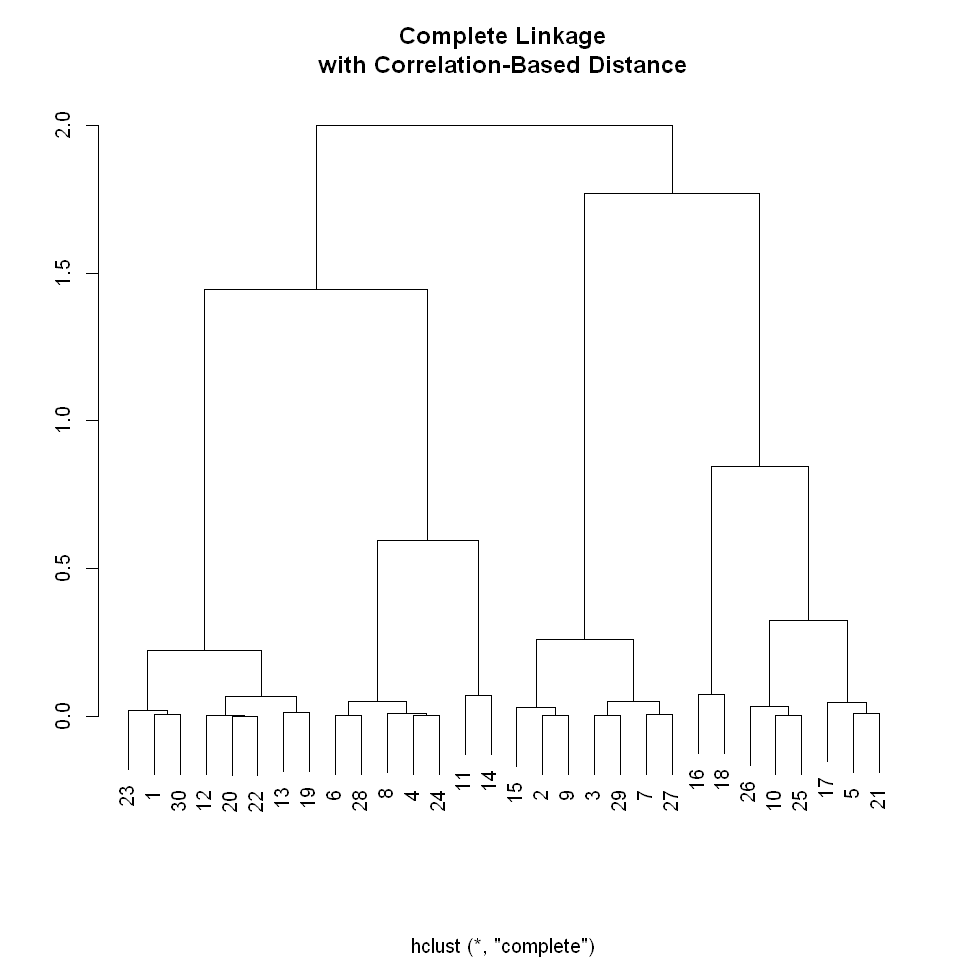

In [12]:
# 3次元
x = matrix(rnorm(30*3), ncol=3)
dd = as.dist(1 - cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage\nwith Correlation-Based Distance", xlab="", ylab="")

In [13]:
# NCI60 data
library(ISLR)
nci_labs = NCI60$labs
nci_data = NCI60$data
print(dim(nci_data))
print(nci_labs[1:4])
print(table(nci_labs))

[1]   64 6830
[1] "CNS"   "CNS"   "CNS"   "RENAL"
nci_labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 


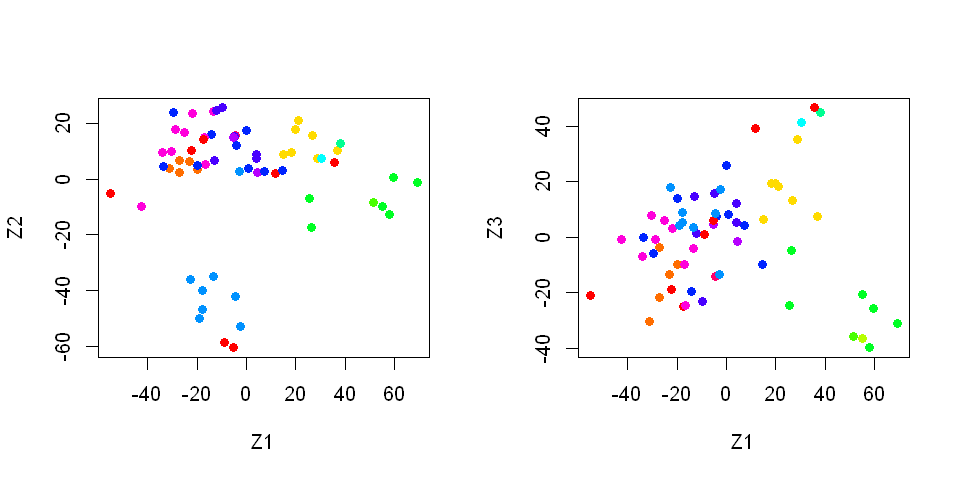

In [14]:
# PCA on the NCI60 Data
pr_out = prcomp(nci_data, scale=TRUE)
Cols = function(vec){
    cols = rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
} # 描画のカラー用
options(repr.plot.width=8, repr.plot.height=4) # jupyter用
par(mfrow=c(1, 2))
plot(pr_out$x[,1:2], col=Cols(nci_labs), pch=19, xlab="Z1", ylab="Z2")
plot(pr_out$x[,c(1, 3)], col=Cols(nci_labs), pch=19, xlab="Z1", ylab="Z3")

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

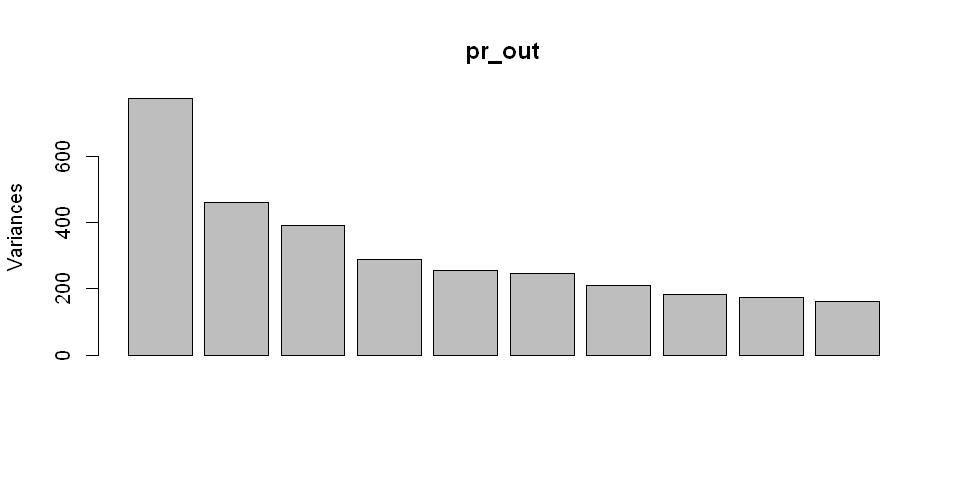

In [15]:
summary(pr_out)
plot(pr_out)

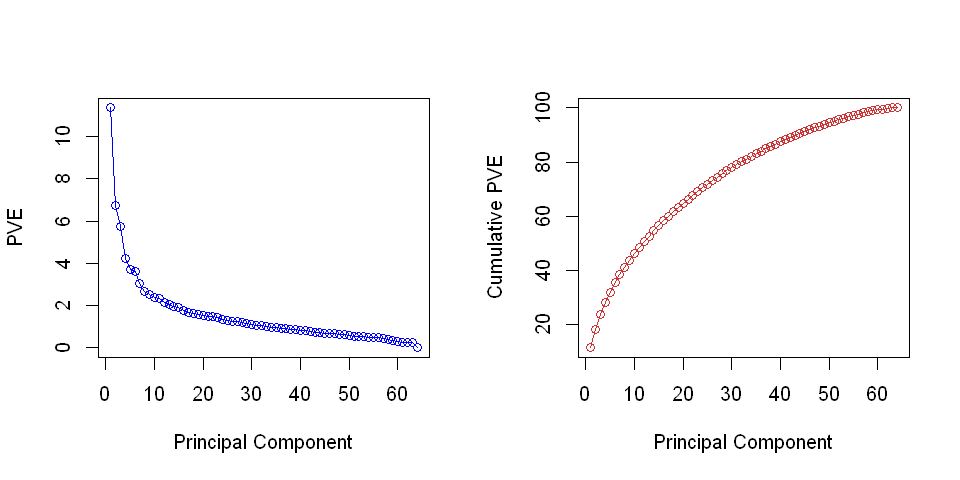

In [16]:
# 寄与率のグラフ
pve = 100 * pr_out$sdev^2 / sum(pr_out$sdev^2)

par(mfrow=c(1, 2))
plot(pve, type="o", ylab="PVE", xlab="Principal Component", col="blue")
plot(cumsum(pve), type="o", ylab="Cumulative PVE", xlab="Principal Component", col="brown3")

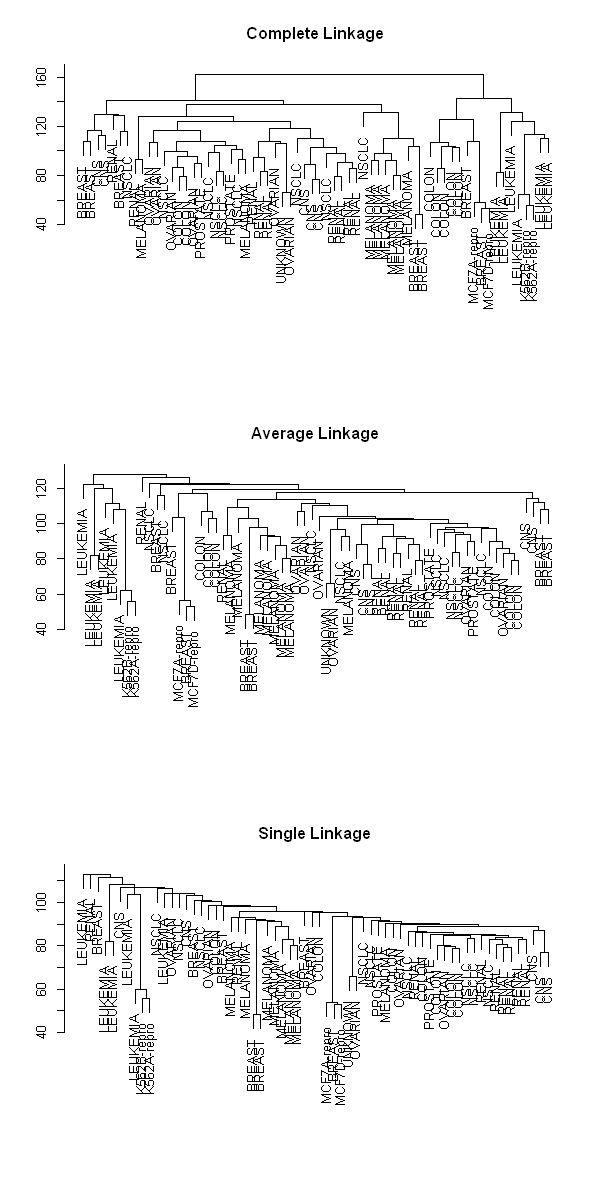

In [17]:
# Clustering of the NCI60 Data
sd_data = scale(nci_data)
options(repr.plot.width=5, repr.plot.height=10) # jupyter用
par(mfrow=c(3, 1))
data_dist = dist(sd_data)
plot(hclust(data_dist), labels=nci_labs, main="Complete Linkage", xlab="", ylab="", sub="")
plot(hclust(data_dist, method="average"), labels=nci_labs, main="Average Linkage", xlab="", ylab="", sub="")
plot(hclust(data_dist, method="single"), labels=nci_labs, main="Single Linkage", xlab="", ylab="", sub="")

In [18]:
# ラベルとの比較
hc_out = hclust(dist(sd_data))
hc_clusters = cutree(hc_out, 4)
print(table(hc_clusters, nci_labs))

           nci_labs
hc_clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci_labs
hc_clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0



Call:
hclust(d = dist(sd_data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 



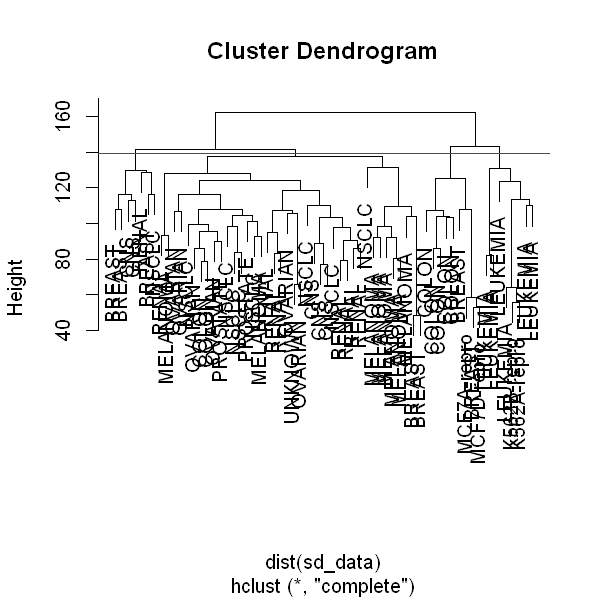

In [19]:
# デンドログラムの描画
options(repr.plot.width=5, repr.plot.height=5) # jupyter用
par(mfrow=c(1, 1))
plot(hc_out, labels=nci_labs)
abline(h=139, col="red")
print(hc_out)

In [20]:
# K-Meansとの比較
set.seed(2)
km_out = kmeans(sd_data, 4, nstart=20)
km_clusters = km_out$cluster
print(table(km_clusters, hc_clusters))

           hc_clusters
km_clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0


   nci_labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci_labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0


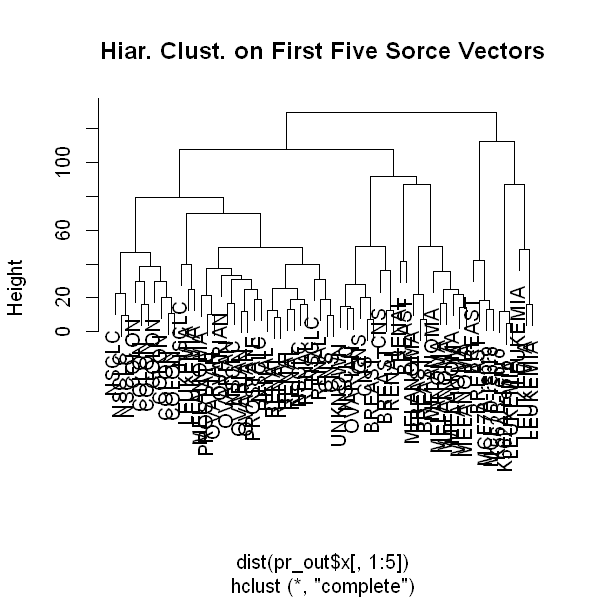

In [21]:
# 主成分分析の結果を用いて階層型クラスタリング
hc_out = hclust(dist(pr_out$x[, 1:5]))
plot(hc_out, labels=nci_labs, main="Hiar. Clust. on First Five Sorce Vectors")
print(table(cutree(hc_out, 4), nci_labs))

## Exercises

### 1. (a)
式（10.12）の左辺の$x_{ij} - x_{i'j}$を$(x_{ij} - \bar{x_{kj}}) - (x_{i'j} - \bar{x_{kj}})$として展開等をしていけば右辺になる。

### (b)
左辺がクラスター内の点の距離の合計，右辺がクラスター内の分散を示す。  
式（10.9）と式（10.10）を組み合わせた式（10.11）は次の通りである。
$$
\underset{minimize}{C_1, \cdots, C_K}{\sum_{k=1}^K \frac{1}{|C_k|} \sum_{i, i' \in C_k} \sum_{j=1}^p(x_{ij} - x_{i'j})^2} \tag{10.11}
$$
これは式（10.12）の左辺の総和である。つまり，この式（10.11）を求めることは，クラスター内の分散を小さくするということである。

### 2. (a)

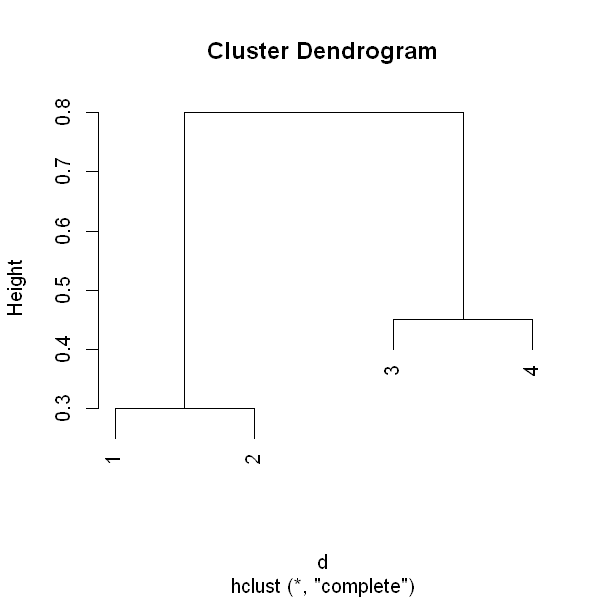

In [22]:
d = as.dist(matrix(c(0, 0.3, 0.4, 0.7, 0.3, 0, 0.5, 0.8, 0.4, 0.5, 0, 0.45, 0.7, 0.8, 0.45, 0), nrow=4))
plot(hclust(d, method='complete'))

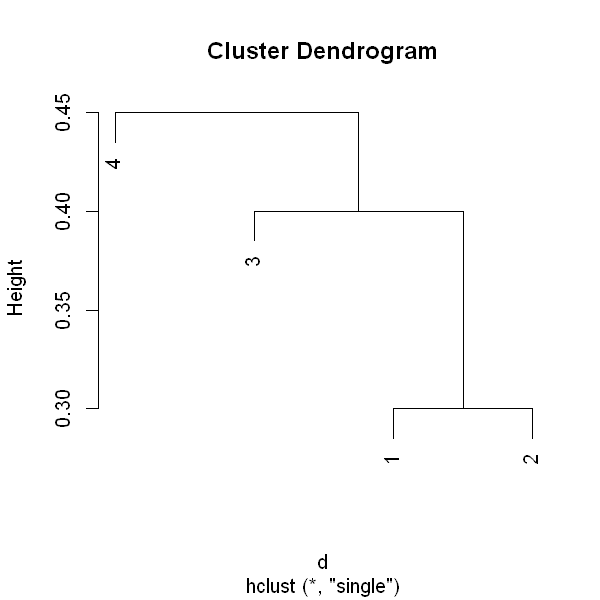

In [23]:
# (b)
plot(hclust(d, method='single'))

### (c)
(a)の結果でクラスター数を2とすると，
(1, 2), (3, 4)

### (d)
(b)の結果でクラスター数を2とすると，
(1, 2, 3), (4)

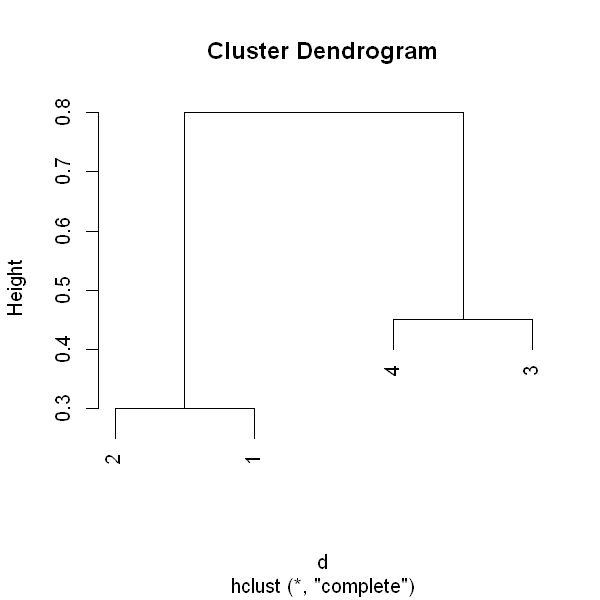

In [24]:
# (e)
# 1と2，3と4を逆にしても類似度の組み合わせが変化しないため，同じ樹形図である。
plot(hclust(d, method='complete'), labels=c(2, 1, 4, 3))

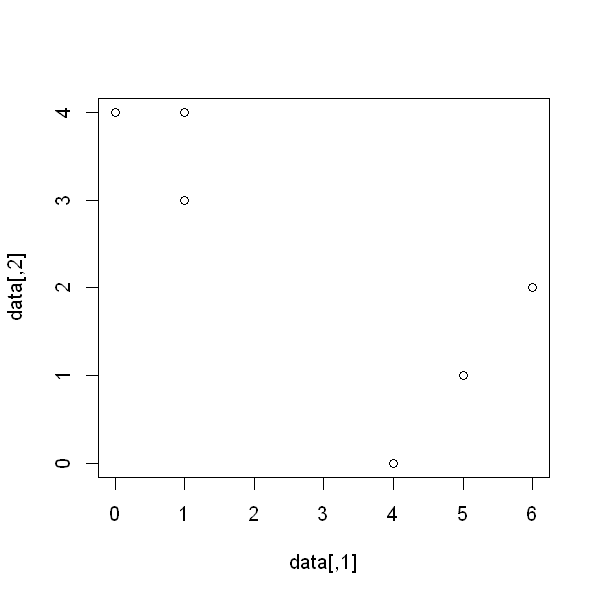

In [25]:
# 3. (a)
data = matrix(c(1, 1, 0, 5, 6, 4, 4, 3, 4, 1, 2, 0), ncol = 2)
options(repr.plot.width=5, repr.plot.height=5) # jupyter用
plot(data)

In [26]:
# (b)
label = sample(1:2, 6, replace=TRUE)
data = data.frame(x=data[, 1], y=data[, 2], label=label)
print(data)

  x y label
1 1 4     2
2 1 3     1
3 0 4     2
4 5 1     2
5 6 2     2
6 4 0     2


In [27]:
# (c)
cent1 = c(mean(data["x"][data["label"] == 1]), mean(data["y"][data["label"] == 1]))
cent2 = c(mean(data["x"][data["label"] == 2]), mean(data["y"][data["label"] == 2]))
print(cent1)
print(cent2)

[1] 1 3
[1] 3.2 2.2


In [28]:
# (d)
label2 = integer(6)
for (i in 1:6){
    dis1 = (data[i, "x"] - cent1[1])^2 + (data[i, "y"] - cent1[2])^2
    dis2 = (data[i, "x"] - cent2[1])^2 + (data[i, "y"] - cent2[2])^2
    if (dis1 < dis2) label2[i] = 1
    else label2[i] = 2
}
data$label2 = label2
print(data)

  x y label label2
1 1 4     2      1
2 1 3     1      1
3 0 4     2      1
4 5 1     2      2
5 6 2     2      2
6 4 0     2      2


In [29]:
# (e)
data = data.frame(x=data$x, y=data$y, label=data$label)
cent1 = c(mean(data["x"][data["label"] == 1]), mean(data["y"][data["label"] == 1]))
cent2 = c(mean(data["x"][data["label"] == 2]), mean(data["y"][data["label"] == 2]))
while (TRUE) {
    new_lab = integer(6)
    for (i in 1:6) {
        dis1 = (data[i, "x"] - cent1[1])^2 + (data[i, "y"] - cent1[2])^2
        dis2 = (data[i, "x"] - cent2[1])^2 + (data[i, "y"] - cent2[2])^2
        if (dis1 < dis2) new_lab[i] = 1
        else new_lab[i] = 2
    }
    if (sum(data$label == new_lab) == 6) {
        data$label = new_lab
        break
    }
    else {
        data$label = new_lab
        cent1 = c(mean(data["x"][data["label"] == 1]), mean(data["y"][data["label"] == 1]))
        cent2 = c(mean(data["x"][data["label"] == 2]), mean(data["y"][data["label"] == 2]))
    }
}
print(data)

  x y label
1 1 4     1
2 1 3     1
3 0 4     1
4 5 1     2
5 6 2     2
6 4 0     2


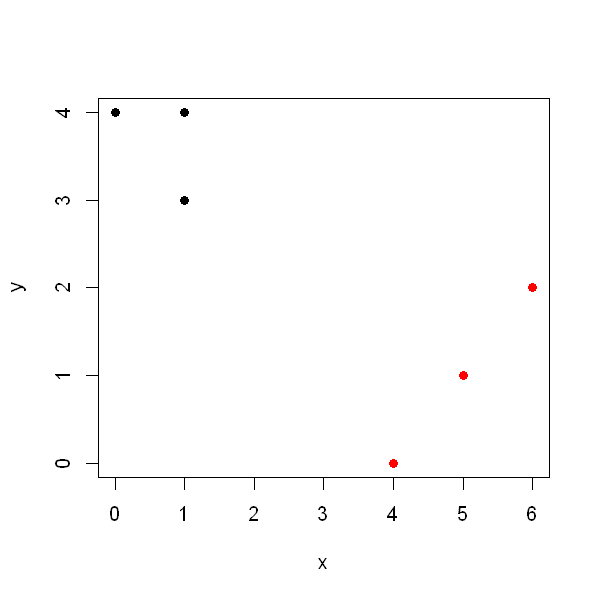

In [30]:
plot(data$x, data$y, col=data$label, pch=19, xlab="x", ylab="y")

### 4. (a)
単連結法でも，完全連結法でも，{1, 2, 3}と{4, 5}の組み合わせで融合する場合

計算に使用する距離（非類似度・以下距離）はどちらも6種類で，$d_{14}, d_{15}, d_{24}, d_{25}, d_{34}, d_{35}$である。

単連結法では，この6個の距離の最小値$D_{min}$が融合するツリーの高さとなる。

一方，完全連結法では，最大値$D_{max}$が融合するツリーの高さとなる。

よって，$D_{min} \leqq D_{max}$となる。

ここで。$D_{min} = D_{max}$の場合を考える。

この場合，距離の最小値と最大値が同じとなる，すなわち全て同じ距離となるため，例えば，変数は2つ（2次元）で，点4を中心とする円の円周上に点1，2，3が存在する場合，$d_{14}, d_{24}, d_{34}$は同じ距離となるが，$d_{15}, d_{25}, d_{35}$も同じ距離であるためには，点4と点5が同じ点でなくてはならない。

つまり，点1～3がそれぞれ異なる点かつ点4，5がそれぞれ異なる点であれば，$D_{min} < D_{max}$となり，完全連結法の方がデンドログラムの背が高くなる。

しかし，点1～3がそれぞれ異なる点かつ点4，5がそれぞれ異なる点であることは書かれていない。

したがって，デンドログラムの背の高さを比較するための情報が不十分である。

### (b)
単連結法でも，完全連結法でも，{5}と{6}の組み合わせで融合する場合

計算に使用する距離は$d_{56}$のみである。

単連結法でも完全連結法でも，この2つを融合させる場合に使用する距離は$d_{56}$となる。

よって，どちらの手法を用いてもデンドログラムの高さは同じである。

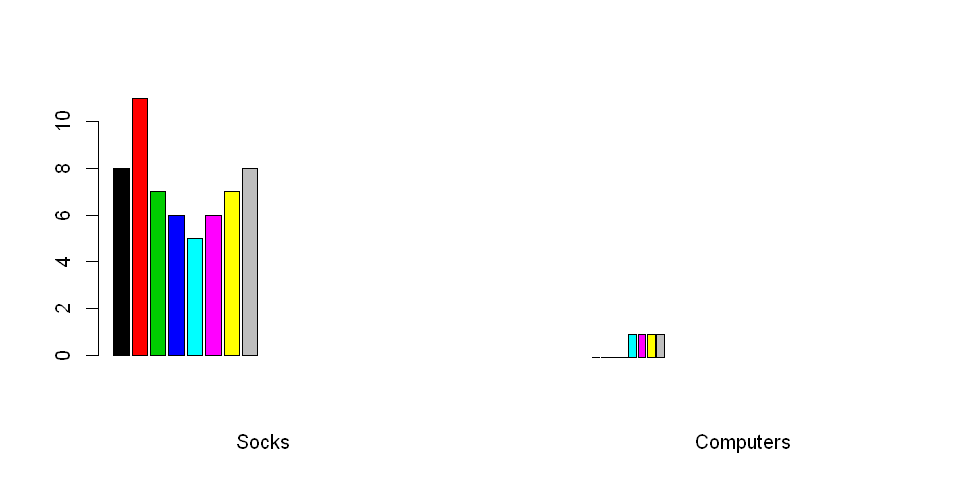

In [31]:
# 5
left=data.frame(socks=c(8,11,7,6,5,6,7,8),
                computers=c(0,0,0,0,1,1,1,1))
left.names = 1:8
options(repr.plot.width=8, repr.plot.height=4) # jupyter用
par(mfrow=c(1,2))
barplot(left$socks,col=as.character(left.names),xlab = 'Socks',width = rep(0.4,8),xlim = c(0,8))
barplot(left$computers,col=as.character(left.names),xlab = 'Computers',width = rep(0.2,8),xlim = c(0,8),ylim=c(0,11),yaxt='n')

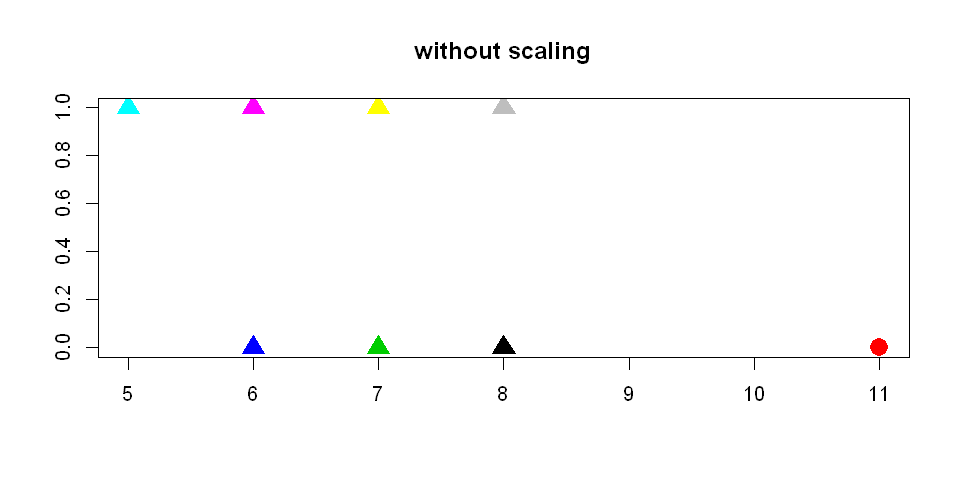

In [32]:
# そのままでK-means（おそらくこれは回答ではない）
km_out = kmeans(left, 2, nstart=10)
plot(left, col=left.names, main="without scaling", xlab="", ylab="", pch=(km_out$cluster+15), cex=2)

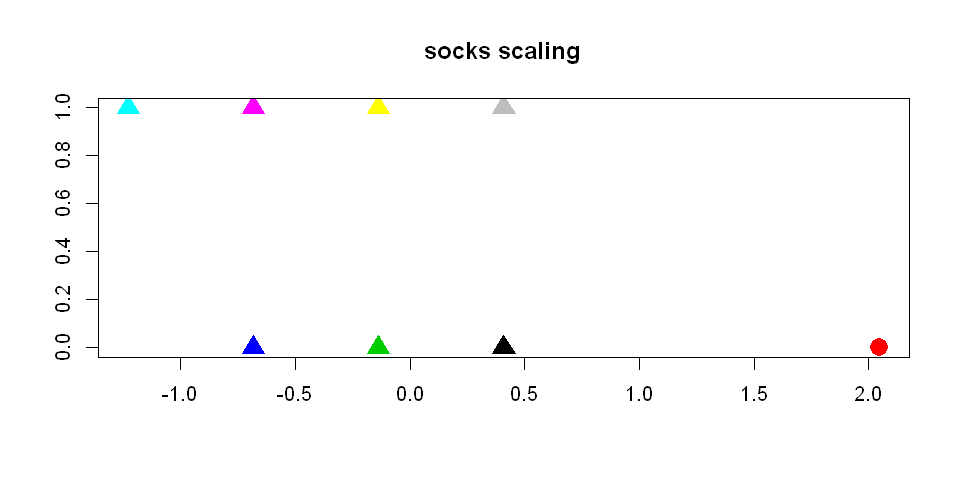

In [33]:
# sockをスケーリング
left_1 = data.frame(socks=scale(left$socks), computers=left$computers)
km_out = kmeans(left_1, 2, nstart=10)
plot(left_1, col=left.names, main="socks scaling", xlab="", ylab="", pch=(km_out$cluster+15), cex=2)

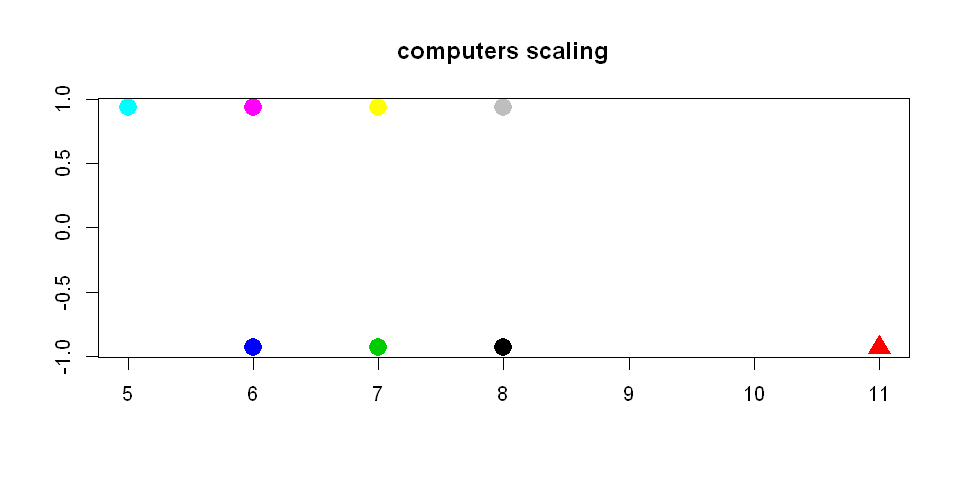

In [34]:
# computerをスケーリング
left_2 = data.frame(socks=left$socks, computers=scale(left$computers))
km_out = kmeans(left_2, 2, nstart=10)
plot(left_2, col=left.names, main="computers scaling", xlab="", ylab="", pch=(km_out$cluster+15), cex=2)

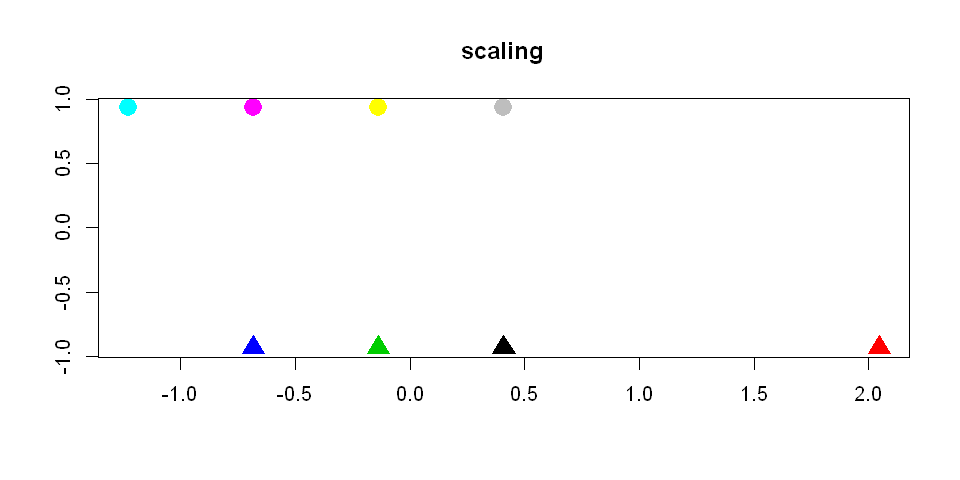

In [35]:
# 両方をスケーリング
left_3 = data.frame(socks=scale(left$socks), computers=scale(left$computers))
km_out = kmeans(left_3, 2, nstart=10)
plot(left_3, col=left.names, main="scaling", xlab="", ylab="", pch=(km_out$cluster+15), cex=2)
# スケーリングによるユークリッド距離の違いによって，先程とは別の分け方となっている

### 6. (a)

第一主成分の寄与率が10％であるということ。

### (b)

